In [1]:
import pandas as pd
import numpy as np
from io import StringIO
! pwd

/homes/cdt21/aleks/tokenization-fairness


In [2]:
with open("assets/tokenization_lengths_validated.csv", 'r') as file:
    data = StringIO(file.read().replace('–––', ''))
df = pd.read_csv(data)
# df=df.replace('---', np.nan)
df=df.set_index('Language')
df=df.sort_index()
df

,GPT-2,r50k_base,p50k_base,p50k_edit,cl100k_base,RoBERTa,GottBERT,CamemBERT,PhoBERT,RoCBert,...,MBart50,mT5,FlanT5,ByT5,CANINE,BLOOM,ArabicBERT,MuRIL,UTF-32,BERT Japanese
Language,,,,,,,,,,,,,,,,,,,,,
Acehnese (Arabic script),251497,251497,251497,251497,199956,251497,390347,NaN,NaN,NaN,...,115462.0,117938.0,NaN,391515,219474,140671,NaN,NaN,219474,NaN
Acehnese (Latin script),113531,113531,113531,113531,104849,113531,122823,124070.0,114495.0,236887.0,...,93370.0,94854.0,147715.0,283335,278522,92532,138840.0,109149.0,278522,146081.0
Afrikaans,101771,101771,101771,101771,89171,101771,98519,110438.0,105102.0,229264.0,...,71572.0,78558.0,124449.0,277732,274530,89808,127906.0,99171.0,274530,131262.0
Akan,147060,147060,147060,147060,141807,147060,149734,131229.0,120943.0,NaN,...,117968.0,119492.0,171393.0,285241,259737,109025,NaN,NaN,259737,150069.0
Amharic,409343,409343,409343,409343,405644,409343,409257,NaN,NaN,NaN,...,79684.0,113583.0,NaN,445855,174268,269501,NaN,NaN,174268,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wolof,112432,112432,112432,112432,101369,112432,117841,114816.0,107121.0,200594.0,...,95169.0,94966.0,151584.0,258805,249234,89305,123622.0,104207.0,249234,130362.0
Xhosa,119033,119033,119033,119033,108969,119033,123648,125740.0,116871.0,244331.0,...,89390.0,88735.0,157869.0,275162,274900,88866,146904.0,110840.0,274900,149963.0
Yoruba,204447,204447,204447,204447,156430,204447,207890,NaN,138921.0,189973.0,...,135480.0,135311.0,NaN,332203,251232,87077,119607.0,NaN,251232,NaN


In [3]:
target_language = {
    "GPT-2": "English",
    "r50k_base": "English",
    "p50k_base": "English",
    "p50k_edit": "English",
    "cl100k_base": "English",
    "RoBERTa": "English",
    "GottBERT": "German",
    "CamemBERT": "French",
    "PhoBERT": "Vietnamese",
    "RoCBert": "Chinese (Simplified)",
    "XLM-RoBERTa": "English",
    "M2M100": "English",
    "MBart50": "English",
    "FlanT5": "English",
    "ByT5": "English",
    "mT5": "English",
    "CANINE": "English",
    "CharacterBERT": "English",
    "BLOOM": "English",
    "MuRIL": "English",
    "ArabicBERT": "Standard Arabic",
    "UTF-32": "English",
    "BERT Japanese": "Japanese",
}

In [4]:
for col in df.columns:
    df[col] /= df.loc[target_language[col], col]


In [5]:
print(len(df), len(df.columns))

204 22


In [6]:
def format_number(x):
    if pd.isnull(x):
        return '---'
    else:
        return f'{x:.2f}'
    


df.iloc[:68, :11].applymap(format_number).to_csv("to_print_1.csv")
df.iloc[:68, 11:].applymap(format_number).to_csv("to_print_2.csv")
df.iloc[68:136, :11].applymap(format_number).to_csv("to_print_3.csv")
df.iloc[68:136, 11:].applymap(format_number).to_csv("to_print_4.csv")
df.iloc[136:, :11].applymap(format_number).to_csv("to_print_5.csv")
df.iloc[136:, 11:].applymap(format_number).to_csv("to_print_6.csv")

# Plots

In [16]:
name = "cl100k_base"
df[name].reindex(df[name].sort_values().index).reset_index()

,Language,cl100k_base
0,English,1.000000
1,Portuguese,1.482218
2,Spanish,1.546986
3,Indonesian,1.552115
4,Galician,1.561446
...,...,...
199,Burmese,11.701864
200,Dzongkha,12.328267
201,Odia,12.481120
202,Santali,12.801155


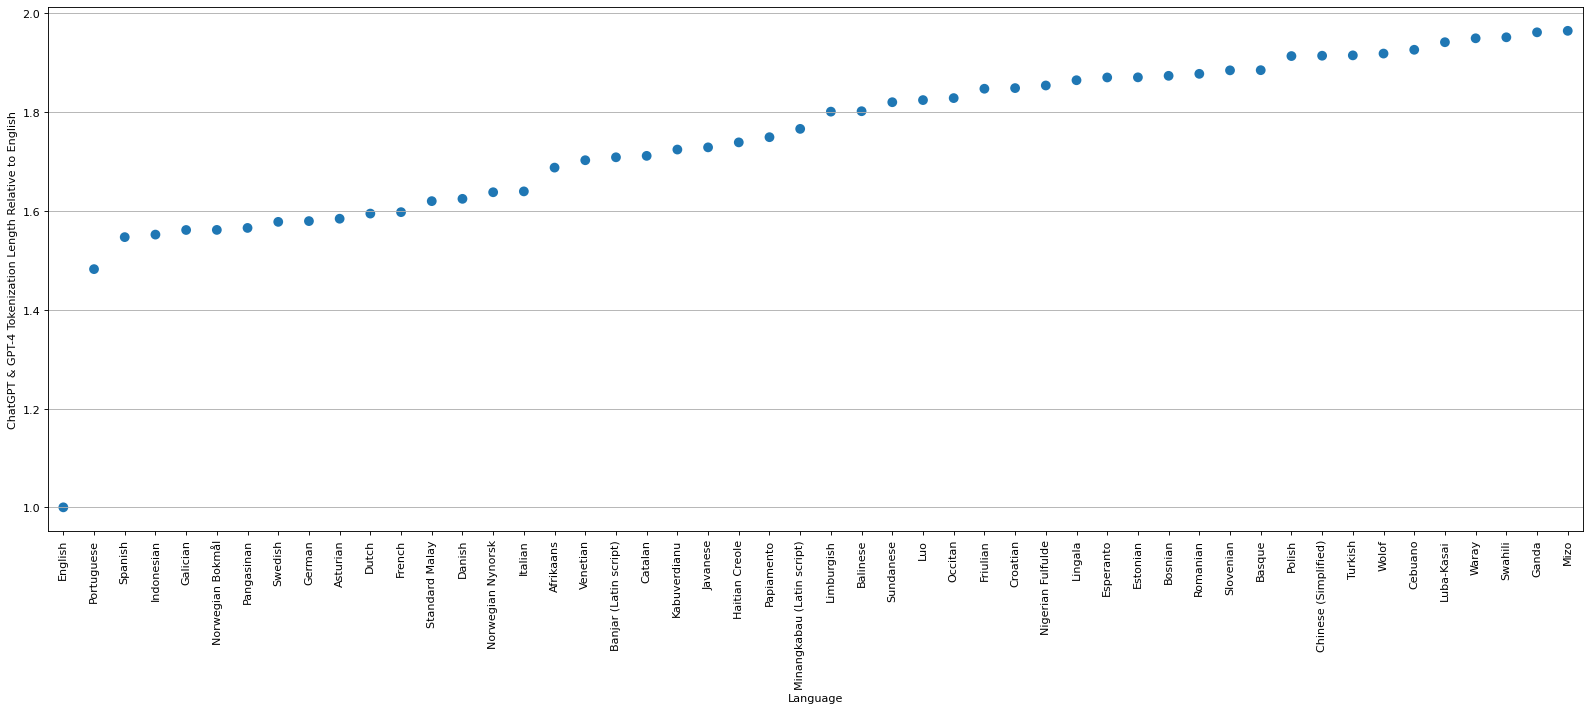

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,9), dpi= 80)
ax = plt.gca()

name = "cl100k_base"

plot_df = df[name].reindex(df[name].sort_values().index).reset_index()
# ax[idx_run-1].figure(figsize=(10,25))
sns.pointplot(
    data=plot_df.iloc[:50],
    y=name,
    x='Language',
    # col=c
)
# ax[idx_run-1].set_yticks(fontsize=8)
# ax.grid()
# rotate x ticks to be vertical
plt.xticks(rotation=90)
plt.tight_layout()
# remove the line show only markers:
ax.lines[0].set_linestyle("")
plt.ylabel("ChatGPT & GPT-4 Tokenization Length Relative to English")
# add only horizontal grid lines
ax.yaxis.grid(True)

plt.savefig("tmp.png")